# TRAINING _ Digit Recognition with CNN

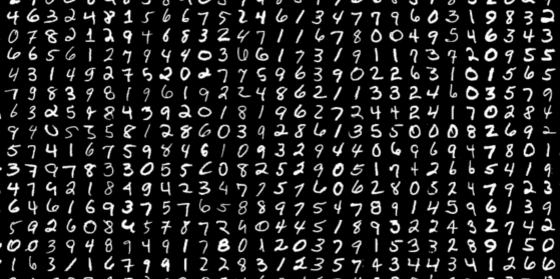




https://www.kaggle.com/competitions/digit-recognizer/data?select=test.csv

Pictures with 28x28 pixels

## Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_filepath=r'\08 _ Deep Learning\02 _ Training\digit-recognizer\train.csv'
df=pd.read_csv(train_filepath)

In [3]:
test_filepath=r'\08 _ Deep Learning\02 _ Training\digit-recognizer\test.csv'
df_test=pd.read_csv(test_filepath)

In [4]:
df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Re-shape Dataframe

In [6]:
df_train = df.iloc[:, 1:].values
df_train = df_train.reshape(-1,28,28) #df_train.reshape(-1, 28, 28) reshapes a 1D NumPy array (df_train) into a 3D array representing images with dimensions (number of samples, 28, 28), automatically determining the number of samples based on the array size.

In [7]:
df_test=df_test.values
df_test= df_test.reshape(-1,28,28)

In [8]:
df_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  17,  17,
         17,  17,  81, 180, 180,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 253,
        253, 253, 253, 253, 253,  48,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Data Viz

In [9]:
print(df_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

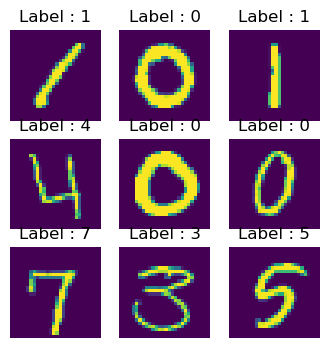

In [10]:
plt.figure(figsize=(4, 4))  # Optional: Set the figure size

for i in range(9):  # Loop through the first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(df_train[i]) 
    plt.axis('off')  # Optional: Turn off axis labels
    plt.title("Label : " + str(df.iloc[i,0]))

plt.show()

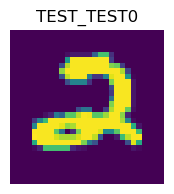

In [11]:
plt.figure(figsize=(2,2))
plt.title("TEST_TEST0")
plt.axis('off')
plt.imshow(df_test[0])

# Build the Convultional Neural Network (CNN)

## Train-Test Split

In [12]:
X = df_train
y = df['label']

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

## Normalization

In [14]:
df.max().max()

255

In [15]:
# NORMALIZING THE DATA FOR THE 256 possible colours on each channel : 
X_train, X_test = X_train / 255, X_test / 255

In [16]:
X_train.max().max()

1.0

## Are the training data unbalanced ? 

In [17]:
print(f'The percentage of different labels across the y_train dataset are : \n{(y_train.value_counts()/len(y_train)*100).round(2)}')

The percentage of different labels across the y_train dataset are : 
1    10.96
7    10.53
3    10.32
9    10.07
2     9.95
0     9.90
4     9.80
6     9.77
8     9.67
5     9.02
Name: label, dtype: float64


## Building the CNN model

In [18]:
X_train[0].shape

(28, 28)

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1))) #  this convolutional layer has 16 filters, each with a 3x3 kernel, and it expects input images with a shape of (28, 28, 1).
model.add(layers.MaxPooling2D((2, 2))) # Yes, when using a 2x2 grid for max-pooling, downsampling occurs. Max-pooling with a 2x2 grid means that the spatial dimensions (width and height) of the input are reduced by half.

#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes for MNIST

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 64)                173120    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 173930 (679.41 KB)
Trainable params: 173930 (679.41 KB)
Non-trainable params: 0 (0.00 Byte)
________________

## Compile the Model & Optimization ADAM

- Before we start training and testing our model, we need to compile it first. This optimizes it and we can also choose a loss function.
- An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit the Model 

- Fit can have all this hyperparamethers :

model.fit(  x=None   y=Non    batch_size=No     epoch 
    verbose='a 
    callbacks ,
    validation_spl 0,
    validation_da ne,
    shuf cle,
    class_we None,
    sample_w =None,
    init poch=0,
    steps_pe ch=None,
    validati eps=None,
    validation_b size=None,
    va ion_freq=1,
    m eue_size=1    workers=1,
    use_mu)processing=False,
)

In [22]:
# Train the model
model_cnn_1 = model.fit(X_train, y_train, epochs=15,validation_split=0.1, verbose=3)

Epoch 1/15


Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15


## Evaluate the Model

In [32]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc}")

263/263 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9831

Test accuracy: 0.9830952286720276


___________

### Graphic Evaluation 

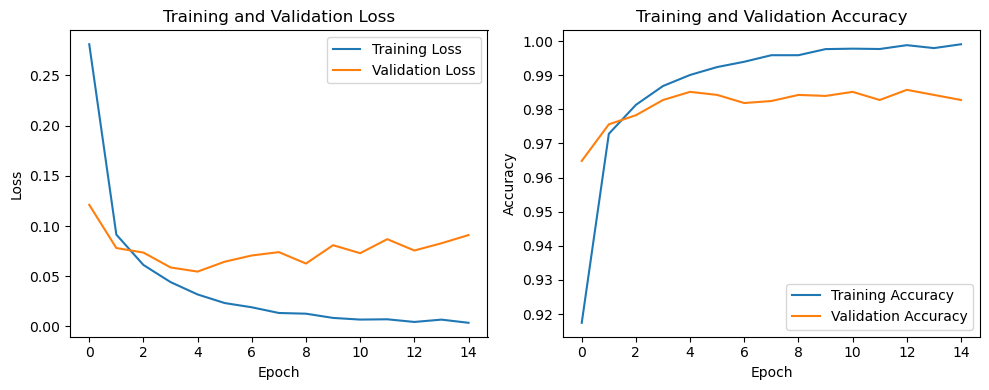

In [24]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_1.history['loss'], label='Training Loss')
plt.plot(model_cnn_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_1.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

_____________

# Another Architecture _ CNN

One more layer (small) of Convolution and Pooling 

## Building the CNN model

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1))) #  this convolutional layer has 16 filters, each with a 3x3 kernel, and it expects input images with a shape of (28, 28, 1).
model.add(layers.MaxPooling2D((2, 2))) # Yes, when using a 2x2 grid for max-pooling, downsampling occurs. Max-pooling with a 2x2 grid means that the spatial dimensions (width and height) of the input are reduced by half.

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes for MNIST

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 8)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

## Compile the Model & Optimization ADAM

- Before we start training and testing our model, we need to compile it first. This optimizes it and we can also choose a loss function.
- An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit the Model 

- Fit can have all this hyperparamethers :

model.fit(  x=None   y=Non    batch_size=No     epoch 
    verbose='a 
    callbacks ,
    validation_spl 0,
    validation_da ne,
    shuf cle,
    class_we None,
    sample_w =None,
    init poch=0,
    steps_pe ch=None,
    validati eps=None,
    validation_b size=None,
    va ion_freq=1,
    m eue_size=1    workers=1,
    use_mu)processing=False,
)

In [28]:
# Train the model
model_cnn_2 = model.fit(X_train, y_train, epochs=15,validation_split=0.1, verbose=3)

Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15


## Evaluate the Model

In [29]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc}")

263/263 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9831

Test accuracy: 0.9830952286720276


___________

### Graphic Evaluation 

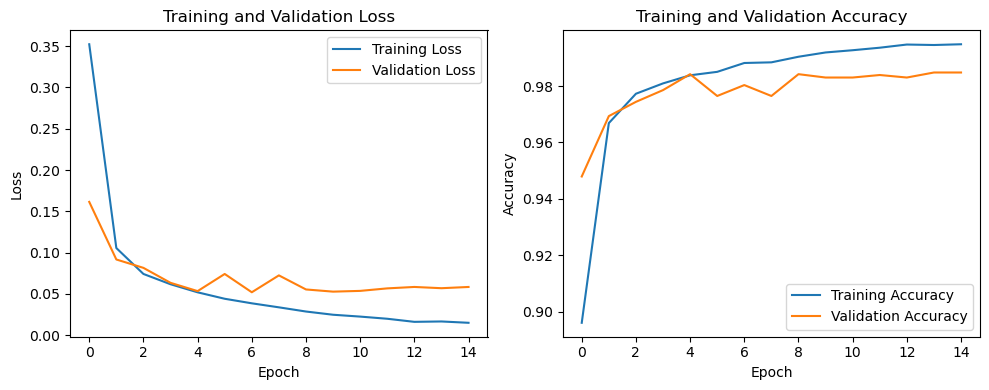

In [30]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_2.history['loss'], label='Training Loss')
plt.plot(model_cnn_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_2.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Predict

In [ ]:
model.predict(X_test)

_____________

# /Another Architecture _ CNN

One more layer (big) of Convolution and Pooling and also more neurons

## Building the CNN model

In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #  this convolutional layer has 16 filters, each with a 3x3 kernel, and it expects input images with a shape of (28, 28, 1).
model.add(layers.MaxPooling2D((2, 2))) # Yes, when using a 2x2 grid for max-pooling, downsampling occurs. Max-pooling with a 2x2 grid means that the spatial dimensions (width and height) of the input are reduced by half.

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes for MNIST

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 batch_normalization (Batch  (None, 11, 11, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                      

## Compile the Model & Optimization ADAM

- Before we start training and testing our model, we need to compile it first. This optimizes it and we can also choose a loss function.
- An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

In [41]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit the Model 

- Fit can have all this hyperparamethers :

model.fit(  x=None   y=Non    batch_size=No     epoch 
    verbose='a 
    callbacks ,
    validation_spl 0,
    validation_da ne,
    shuf cle,
    class_we None,
    sample_w =None,
    init poch=0,
    steps_pe ch=None,
    validati eps=None,
    validation_b size=None,
    va ion_freq=1,
    m eue_size=1    workers=1,
    use_mu)processing=False,
)

In [42]:
# Train the model
model_cnn_3 = model.fit(X_train, y_train, epochs=15,validation_split=0.1, verbose=3)

Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15


## Evaluate the Model

In [43]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc}")

263/263 [==============================] - 1s 2ms/step - loss: 0.0550 - accuracy: 0.9868

Test accuracy: 0.9867857098579407


___________

### Graphic Evaluation 

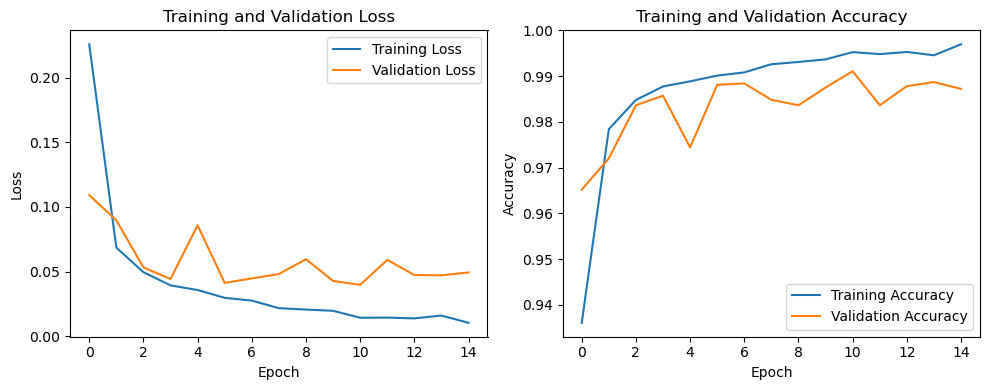

In [44]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_3.history['loss'], label='Training Loss')
plt.plot(model_cnn_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_3.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Predict

In [56]:
Predict_3 = model.predict(X_test)

263/263 [==============================] - 1s 2ms/step


Predicted : 0 | Real 0


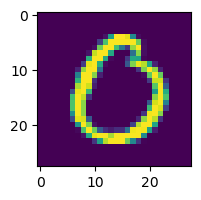

Predicted : 3 | Real 3


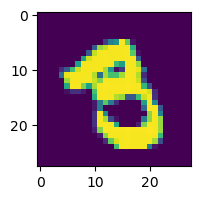

Predicted : 1 | Real 1


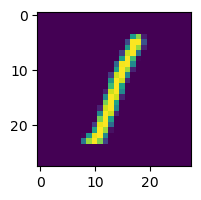

Predicted : 8 | Real 9


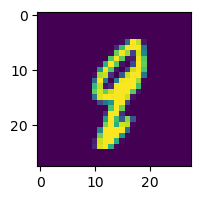

Predicted : 7 | Real 7


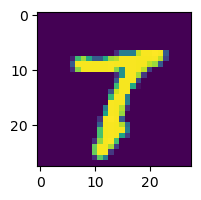

Predicted : 8 | Real 8


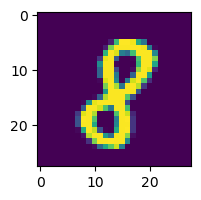

Predicted : 2 | Real 2


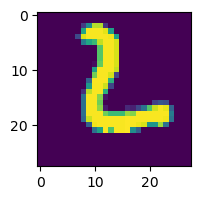

Predicted : 1 | Real 1


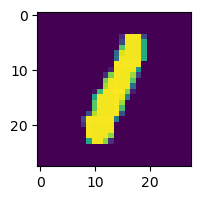

Predicted : 4 | Real 4


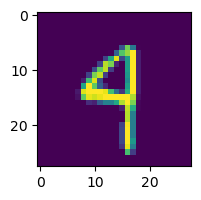

Predicted : 5 | Real 5


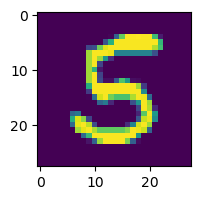

In [70]:
for i in range(10):
    print(f'Predicted : {Predict_3[i].argmax()} | Real {y_test.iloc[i]}')
    plt.figure(figsize=(2,2))
    plt.axis=('off')
    plt.imshow(X_test[i])
    plt.show()

_____________

In [86]:
# Extract argmax of predictions
predicted_labels = [each_array.argmax() for each_array in Predict_3]

# Create a DataFrame
testing_results3 = pd.DataFrame({
    'Predicted': predicted_labels,
    'Real': y_test.tolist(),
    'Validation': testing_results3['Predicted'] == testing_results3['Real']
})

In [88]:
testing_results3['Validation'].value_counts()

True     8289
False     111
Name: Validation, dtype: int64

In [96]:
print('On which numbers do we have more errors: \n')
print(testing_results3[testing_results3['Validation']==False]['Real'].value_counts())

On which numbers do we have more errors: 

9    19
7    15
2    15
3    14
6    12
5    11
4     9
1     6
0     5
8     5
Name: Real, dtype: int64


In [97]:
print('On which numbers do we have more accertiveness : \n')
print(testing_results3[testing_results3['Validation']==True]['Real'].value_counts())

On which numbers do we have more accertiveness : 

1    996
3    871
7    847
6    841
2    818
8    810
0    799
9    786
4    769
5    752
Name: Real, dtype: int64


In [101]:
pd.pivot_table(testing_results3, index='Real', columns='Validation', aggfunc='size', fill_value=0)


Validation,False,True
Real,,
0,5,799
1,6,996
2,15,818
3,14,871
4,9,769
5,11,752
6,12,841
7,15,847
8,5,810


In [102]:
pd.crosstab(index=testing_results3['Real'], columns=testing_results3['Validation'], margins=True, margins_name='Grand Total')


Validation,False,True,Grand Total
Real,,,
0,5,799,804
1,6,996,1002
2,15,818,833
3,14,871,885
4,9,769,778
5,11,752,763
6,12,841,853
7,15,847,862
8,5,810,815
